# Add operation

In [17]:
%matplotlib inline
import pandas as pd
from os import listdir
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_rows', 100)

path = 'csv'
prefix = 'add_test_2048x2048'

columns = ['stat', 'rank', 'size', 'round', 'time_ms']
data = pd.DataFrame(columns=columns + ['method'])
for file in listdir(path):
    if not file.endswith('.csv') or file == 'stats.csv' or not file.startswith(prefix):
        continue
    print(file)
    
    d = pd.read_csv(os.path.join(path, file), names=columns)
    d['method'] = file.replace('.csv', '').split('_')[-1]
    d['image_size'] = int(file.replace('.csv', '').split('_')[-2].split('x')[-1])
    
    data = pd.concat([data, d])
data.reset_index()

for t in ['rank', 'size', 'round', 'time_ms']:
    data[t] = data[t].astype('int')

# skip first run
data = data[(data['round'] == 0)] # | (data['stat'].isin(['read', 'write']))]
data['image_size'].unique()

def fix_labels(ax):
    for label in ax.legend().get_texts():
        n = int(float(label.get_text()))
        label.set_text(f"2048x2048x{n}")

add_test_2048x2048x1000_clij.csv
add_test_2048x2048x1000_default.csv
add_test_2048x2048x1000_mpi.csv
add_test_2048x2048x1000_mpisingle.csv
add_test_2048x2048x1000_nativempi.csv
add_test_2048x2048x100_clij.csv
add_test_2048x2048x100_default.csv
add_test_2048x2048x100_mpi.csv
add_test_2048x2048x100_mpisingle.csv
add_test_2048x2048x100_nativempi.csv
add_test_2048x2048x10_clij.csv
add_test_2048x2048x10_default.csv
add_test_2048x2048x10_mpi.csv
add_test_2048x2048x10_mpisingle.csv
add_test_2048x2048x10_nativempi.csv
add_test_2048x2048x10_qvizclij.csv
add_test_2048x2048x1500_clij.csv
add_test_2048x2048x1500_default.csv
add_test_2048x2048x1500_mpi.csv
add_test_2048x2048x1500_mpisingle.csv
add_test_2048x2048x1500_nativempi.csv
add_test_2048x2048x2000_default.csv
add_test_2048x2048x2000_mpi.csv
add_test_2048x2048x2000_mpisingle.csv
add_test_2048x2048x2000_nativempi.csv
add_test_2048x2048x2500_mpi.csv
add_test_2048x2048x2500_mpisingle.csv
add_test_2048x2048x2500_nativempi.csv
add_test_2048x2048x3

In [18]:
def by_imagesize(method, stat='total_op'):
    series = {}
    for image_size in sorted(data['image_size'].unique()):
        ds = data[(data['stat'] == stat) & (data['method'] == method) & (data['image_size'] == image_size)].pivot_table(index=['size', 'round'], columns='rank', values='time_ms')
        time = defaultdict(list)
        for idx, times in ds.iterrows():
            size, round = idx
            time[size].append(max(times))

        averaged = {k: sum(v)/len(v) for k, v in time.items()} 
        series[image_size] = pd.Series(averaged, dtype=np.float64)
    
    df = pd.DataFrame(series).dropna(axis=1,how='all')
    df.index.name = 'size'
    return df
display(by_imagesize('default'))
display(by_imagesize('mpi'))
display(by_imagesize('nativempi'))
display(by_imagesize('mpisingle'))
display(by_imagesize('clij'))

,10.0,50.0,100.0,500.0,1000.0,1500.0,2000.0
size,,,,,,,
1,599.0,2061.0,3850.0,18744.0,36980.0,56081.0,75118.0


,10.0,50.0,100.0,500.0,1000.0,1500.0,2000.0,2500.0,3000.0
size,,,,,,,,,
1,1336.0,976.0,1152.0,3141.0,5491.0,7371.0,9575.0,11182.0,13724.0
2,1157.0,1074.0,1242.0,2758.0,4774.0,6917.0,8637.0,11459.0,11926.0
3,1226.0,1305.0,1368.0,2831.0,8713.0,6988.0,8604.0,9916.0,12413.0
4,1297.0,1585.0,1330.0,2693.0,4261.0,6047.0,8197.0,9526.0,11769.0
5,1366.0,1361.0,1438.0,2919.0,5220.0,6774.0,8430.0,10594.0,21268.0
6,1387.0,1568.0,1876.0,3295.0,6786.0,8026.0,9539.0,11881.0,13415.0
7,1398.0,1698.0,1571.0,3213.0,7041.0,7429.0,9881.0,11737.0,13749.0
8,1500.0,1657.0,1902.0,3270.0,5408.0,7899.0,9524.0,12093.0,13456.0


,10.0,50.0,100.0,500.0,1000.0,1500.0,2000.0,2500.0,3000.0
size,,,,,,,,,
1,259.0,412.0,574.0,3720.0,3892.0,5950.0,7994.0,10921.0,NaN
2,364.0,549.0,744.0,2480.0,9740.0,7491.0,10634.0,11661.0,NaN
3,463.0,594.0,836.0,2681.0,9395.0,7645.0,10224.0,14219.0,NaN
4,587.0,722.0,955.0,2918.0,5678.0,8582.0,11198.0,14161.0,NaN
5,664.0,796.0,1024.0,3520.0,6177.0,8814.0,11625.0,NaN,NaN
6,738.0,882.0,1161.0,3704.0,5800.0,8745.0,11127.0,NaN,NaN
7,874.0,999.0,1206.0,3392.0,6529.0,10833.0,11955.0,NaN,NaN
8,987.0,1128.0,1348.0,3344.0,6625.0,9155.0,13032.0,NaN,24134.0


,10.0,50.0,100.0,500.0,1000.0,1500.0,2000.0,2500.0,3000.0
size,,,,,,,,,
1,794.0,2909.0,5566.0,28759.0,57282.0,70677.0,94355.0,118029.0,141153.0
2,699.0,1821.0,3229.0,15947.0,30730.0,45821.0,60405.0,62922.0,75700.0
3,684.0,1434.0,2481.0,11231.0,22197.0,32452.0,43080.0,52986.0,64511.0
4,702.0,1310.0,2091.0,9165.0,17656.0,26205.0,35007.0,42710.0,50342.0
5,714.0,1195.0,1877.0,7470.0,14377.0,23262.0,29192.0,36603.0,44528.0
6,812.0,1277.0,1820.0,6951.0,12916.0,20259.0,27203.0,33106.0,41159.0
7,882.0,1306.0,1714.0,6313.0,11804.0,17879.0,24320.0,31725.0,37966.0
8,997.0,1362.0,1823.0,6088.0,11346.0,16289.0,22232.0,28887.0,45561.0


,10.0,50.0,100.0,500.0
size,,,,
1,1773.0,2997.0,4811.0,22095.0


In [19]:
by_imagesize('nativempi')#, stat='copyToNative')
by_imagesize('mpi', stat='gather')

,10.0,50.0,100.0,500.0,1000.0,1500.0,2000.0,2500.0,3000.0
size,,,,,,,,,
1,25.0,78.0,148.0,711.0,1613.0,2238.0,3059.0,3511.0,4278.0
2,47.0,121.0,218.0,971.0,1967.0,3065.0,3695.0,4415.0,5187.0
3,54.0,125.0,221.0,1136.0,2155.0,3184.0,4064.0,4671.0,5450.0
4,73.0,150.0,241.0,1035.0,1886.0,2911.0,4228.0,4849.0,5993.0
5,86.0,155.0,258.0,1215.0,2816.0,3827.0,4566.0,5746.0,7726.0
6,96.0,201.0,293.0,1414.0,3150.0,4923.0,5917.0,7184.0,8179.0
7,109.0,230.0,320.0,1494.0,3235.0,4706.0,6263.0,7237.0,8598.0
8,144.0,208.0,344.0,1486.0,3182.0,5139.0,6056.0,7968.0,8701.0


# Addition time comparison between different implementation approaches (max 4 nodes)

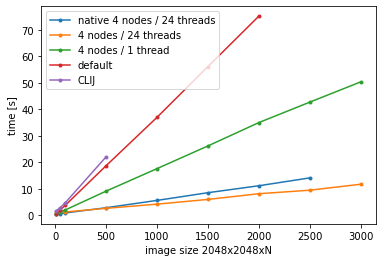

In [10]:
plt.plot(by_imagesize('nativempi').loc[4]/1000, marker='.', label='native 4 nodes / 24 threads')
plt.plot(by_imagesize('mpi').loc[4]/1000, marker='.', label='4 nodes / 24 threads')
plt.plot(by_imagesize('mpisingle').loc[4]/1000, marker='.', label='4 nodes / 1 thread')
plt.plot(by_imagesize('default').loc[1]/1000, marker='.', label='default')
plt.plot(by_imagesize('clij').loc[1]/1000, marker='.', label='CLIJ')
plt.xlabel('image size 2048x2048xN')
plt.ylabel('time [s]')
plt.legend()
plt.savefig('figures/add_comparison.pdf')

,10.0,50.0,100.0,500.0,1000.0,1500.0,2000.0,2500.0,3000.0
size,,,,,,,,,
1,794.0,2909.0,5566.0,28759.0,57282.0,70677.0,94355.0,118029.0,141153.0
2,699.0,1821.0,3229.0,15947.0,30730.0,45821.0,60405.0,62922.0,75700.0
3,684.0,1434.0,2481.0,11231.0,22197.0,32452.0,43080.0,52986.0,64511.0
4,702.0,1310.0,2091.0,9165.0,17656.0,26205.0,35007.0,42710.0,50342.0
5,714.0,1195.0,1877.0,7470.0,14377.0,23262.0,29192.0,36603.0,44528.0
6,812.0,1277.0,1820.0,6951.0,12916.0,20259.0,27203.0,33106.0,41159.0
7,882.0,1306.0,1714.0,6313.0,11804.0,17879.0,24320.0,31725.0,37966.0
8,997.0,1362.0,1823.0,6088.0,11346.0,16289.0,22232.0,28887.0,45561.0


,10.0,50.0,100.0,500.0,1000.0,1500.0,2000.0,2500.0,3000.0
size,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.135908,1.597474,1.723753,1.803411,1.864042,1.542459,1.562040,1.875799,1.864637
3,1.160819,2.028591,2.243450,2.560680,2.580619,2.177894,2.190227,2.227551,2.188045
4,1.131054,2.220611,2.661884,3.137916,3.244336,2.697081,2.695318,2.763498,2.803881
5,1.112045,2.434310,2.965370,3.849933,3.984280,3.038303,3.232221,3.224572,3.169983
6,0.977833,2.277995,3.058242,4.137390,4.434964,3.488672,3.468551,3.565185,3.429456
7,0.900227,2.227412,3.247375,4.555520,4.852762,3.953073,3.879729,3.720378,3.717879
8,0.796389,2.135830,3.053209,4.723883,5.048652,4.338940,4.244108,4.085886,3.098110


Text(0, 0.5, 'speedup')

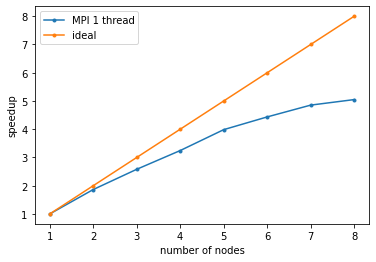

In [11]:
method = 'mpisingle'
image_size = 1000
display(by_imagesize(method))
display(by_imagesize(method).loc[1] / by_imagesize(method))
(by_imagesize(method).loc[1][image_size]/by_imagesize(method)[image_size]).plot(marker='.', label='MPI 1 thread')
plt.plot(np.arange(1, 9), np.arange(1, 9), marker='.', label='ideal')
plt.legend()
plt.xlabel('number of nodes')
plt.ylabel('speedup')
#plt.savefig('figures/add_mpisingle_speedup.pdf')

In [12]:
display(by_imagesize('mpisingle', stat='gather'))
display(by_imagesize('mpisingle', stat='cz.it4i.scijava.mpi.ops.parallel.ThreadedParallel'))
display(by_imagesize('mpisingle', stat='barrier'))
#display(by_imagesize('mpi', stat='barrier'))
display(by_imagesize('mpisingle', stat='total_op'))

,10.0,50.0,100.0,500.0,1000.0,1500.0,2000.0,2500.0,3000.0
size,,,,,,,,,
1,25.0,86.0,154.0,743.0,1539.0,2053.0,2856.0,3572.0,4616.0
2,45.0,123.0,230.0,1295.0,2205.0,2951.0,3664.0,4235.0,5298.0
3,52.0,127.0,228.0,1554.0,2169.0,3222.0,3757.0,4731.0,6132.0
4,66.0,137.0,234.0,1451.0,2235.0,3338.0,4950.0,5368.0,6368.0
5,79.0,158.0,278.0,1486.0,2874.0,4135.0,4767.0,6358.0,8496.0
6,99.0,188.0,301.0,1651.0,3094.0,4679.0,5872.0,7389.0,8870.0
7,106.0,212.0,294.0,1732.0,3004.0,4728.0,6087.0,8103.0,9427.0
8,123.0,236.0,360.0,1956.0,3393.0,4575.0,5891.0,8203.0,9664.0


,10.0,50.0,100.0,500.0,1000.0,1500.0,2000.0,2500.0,3000.0
size,,,,,,,,,
1,544.0,2574.0,5096.0,27229.0,54557.0,66773.0,89283.0,111547.0,133175.0
2,293.0,1318.0,2569.0,13880.0,27290.0,41211.0,54370.0,55843.0,67132.0
3,228.0,889.0,1748.0,8861.0,18853.0,27360.0,36867.0,45205.0,55176.0
4,183.0,684.0,1300.0,6548.0,14113.0,20964.0,27523.0,34253.0,40393.0
5,120.0,544.0,1050.0,5179.0,10464.0,17187.0,22340.0,27247.0,32655.0
6,136.0,480.0,896.0,4451.0,8594.0,13832.0,18854.0,22710.0,27452.0
7,127.0,427.0,781.0,3713.0,7499.0,11208.0,15635.0,20768.0,23517.0
8,114.0,377.0,689.0,3321.0,6529.0,9974.0,13844.0,17738.0,21032.0


,10.0,50.0,100.0,500.0,1000.0,1500.0,2000.0,2500.0,3000.0
size,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.0,42.0,20.0,190.0,280.0,652.0,383.0,31.0,632.0
3,30.0,26.0,26.0,379.0,662.0,505.0,1077.0,578.0,820.0
4,38.0,69.0,46.0,234.0,658.0,913.0,982.0,731.0,386.0
5,53.0,60.0,70.0,76.0,134.0,1103.0,634.0,526.0,452.0
6,84.0,95.0,102.0,222.0,241.0,385.0,1159.0,392.0,1593.0
7,101.0,124.0,106.0,268.0,305.0,531.0,581.0,1462.0,1896.0
8,113.0,129.0,119.0,283.0,357.0,515.0,661.0,1081.0,12369.0


,10.0,50.0,100.0,500.0,1000.0,1500.0,2000.0,2500.0,3000.0
size,,,,,,,,,
1,794.0,2909.0,5566.0,28759.0,57282.0,70677.0,94355.0,118029.0,141153.0
2,699.0,1821.0,3229.0,15947.0,30730.0,45821.0,60405.0,62922.0,75700.0
3,684.0,1434.0,2481.0,11231.0,22197.0,32452.0,43080.0,52986.0,64511.0
4,702.0,1310.0,2091.0,9165.0,17656.0,26205.0,35007.0,42710.0,50342.0
5,714.0,1195.0,1877.0,7470.0,14377.0,23262.0,29192.0,36603.0,44528.0
6,812.0,1277.0,1820.0,6951.0,12916.0,20259.0,27203.0,33106.0,41159.0
7,882.0,1306.0,1714.0,6313.0,11804.0,17879.0,24320.0,31725.0,37966.0
8,997.0,1362.0,1823.0,6088.0,11346.0,16289.0,22232.0,28887.0,45561.0


# Copy time from Java VM to C buffer (for Native approach)

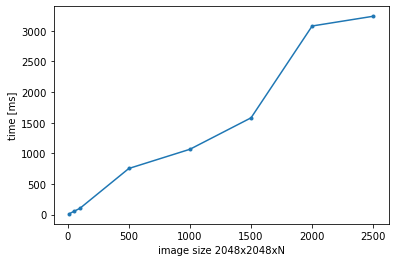

2950.1

In [13]:
by_imagesize('nativempi', stat='copyToNative').loc[1].plot(marker='.')
plt.xlabel('image size 2048x2048xN')
plt.ylabel('time [ms]')
plt.savefig('figures/add_native_copy.pdf')
plt.show()
data[(data['method'] == 'nativempi') & (data['stat'] == 'copyToNative') & (data['image_size'] == 2500)]['time_ms'].mean()

## MPI Gathering times

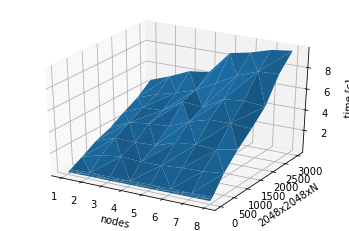

In [14]:
d = pd.DataFrame(by_imagesize('mpisingle', stat='gather').unstack().reset_index())
d.rename(columns={'level_0':'image_size', 0: 'time_ms'}, inplace=True)

fig = plt.figure()
ax = fig.gca(projection='3d') #, title='Convolution time of image size on number of nodes/1thread')
ax.plot_trisurf(d['size'], d['image_size'], d['time_ms'] / 1000)
ax.set_xlabel('nodes')
ax.set_ylabel('2048x2048xN')
ax.set_zlabel('time [s]')
plt.savefig('figures/add_mpisingle_gather.pdf')
plt.show()

## Addition time with single thread

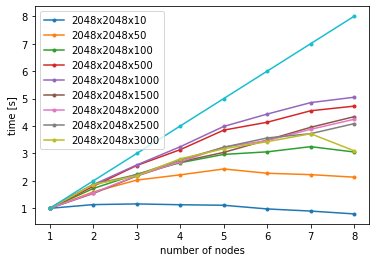

In [21]:
ds = by_imagesize('mpisingle')

ax = (ds.loc[1] / ds).plot(marker='.')#, title='Convolution time for single thread')
ax.set_ylabel('time [s]')
ax.set_xlabel('number of nodes')
fix_labels(ax)
plt.plot(np.arange(1, 9), np.arange(1, 9), marker='.', label='ideal')
plt.savefig('figures/add_mpisingle_speedup.pdf')